# **Mask Detection and Social Distancing:** (Task2) Face Detection

Through this notebook we implement a PyTorch model to detect faces on images. 

___
___

## **1. INITIALIZATION**

### *1.1. IMPORTS*

In [1]:
from IPython.display import display
from xml.dom import minidom # to manipulate .xml files

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import time

from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms

import torch
import torch.nn as nn

In [2]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device: {}".format(device))

device: cuda


### *1.2. DATA LOADING*

In [3]:
root_dir = "data/FaceMaskDetection/"

In [4]:
def get_annotations(root_dir):

    """

    arg:
    - root_dir (string): 
        the directory with the "images" and "annotations" folders
    
    out:
    - df (dataframe):
        a dataframe matching an image id and a bounding box id to the size of
        the image and the position of the bounding box and its annotation:
        "without mask" => -1 | "with mask" => 1 |"mask_weared_incorrect" => 0  
    """

    files = os.listdir(root_dir+"annotations/")
    files.sort()
    
    # if the dataframe has not been created yet (saved in the "annotations.csv" file later)
    if "annotations.csv" not in files:

        data = []
        mask_value = {"without_mask": -1, "mask_weared_incorrect": 0, "with_mask": 1}

        for file in files:
        
            ann = minidom.parse(root_dir+"annotations/"+file)
            img_id = int(ann.getElementsByTagName("filename")[0].firstChild.data[12:-4])
            img_height = int(ann.getElementsByTagName("height")[0].firstChild.data)
            img_width = int(ann.getElementsByTagName("width")[0].firstChild.data)
        
            for i,object in enumerate(ann.getElementsByTagName("object")):

                box_id = i
                
                label = mask_value[object.getElementsByTagName("name")[0].firstChild.data]
                xmin = object.getElementsByTagName("xmin")[0].firstChild.data
                xmax = object.getElementsByTagName("xmax")[0].firstChild.data
                ymin = object.getElementsByTagName("ymin")[0].firstChild.data
                ymax = object.getElementsByTagName("ymax")[0].firstChild.data

                data.append((img_id, img_height, img_width, box_id, label, xmin, xmax, ymin, ymax))
        
        columns = ["img_id", "img_height", "img_width", "box_id", "label", "xmin", "xmax", "ymin", "ymax"]
        pd.DataFrame(data=data, columns=columns, index=None).to_csv(root_dir+"annotations/annotations.csv", index=None)
        
    return pd.read_csv(root_dir+"annotations/annotations.csv", index_col=False)

In [5]:
annotations = get_annotations(root_dir)
display(annotations)

,img_id,img_height,img_width,box_id,label,xmin,xmax,ymin,ymax
0,0,366,512,0,-1,79,109,105,142
1,0,366,512,1,1,185,226,100,144
2,0,366,512,2,-1,325,360,90,141
3,1,156,400,0,1,321,354,34,69
4,1,156,400,1,1,224,261,38,73
...,...,...,...,...,...,...,...,...,...
4067,98,267,400,2,1,263,287,62,85
4068,98,267,400,3,1,344,377,80,106
4069,99,267,400,0,0,181,273,54,162
4070,99,267,400,1,1,99,176,87,165


___

## **2. THE MODEL**

We followed this tutorial on [GitHub](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data)

In [7]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

Using cache found in /home/akbd/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-11-13 torch 1.10.0+cu102 CUDA:0 (NVIDIA GeForce GTX 1660 Ti with Max-Q Design, 5945MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
torch.save(model.state_dict(), "models/FaceDetection.pt")

___

## **3. TESTING THE MODEL**

/tmp/ipykernel_182822/3987678797.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


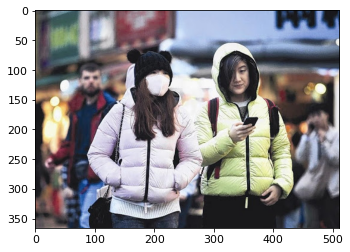

In [11]:
img = plt.imread(root_dir+"images/maksssksksss{}.png".format(0))
if img.shape[-1] == 4:
    img = img[:,:,:3]
plt.imshow(img)
plt.show()

In [12]:
r = model(img)

In [13]:
r.print()

image 1/1: 366x512 (no detections)
Speed: 5.9ms pre-process, 59.6ms inference, 0.4ms NMS per image at shape (1, 3, 480, 640)
